In [1]:
#Libraries to be used

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
#loading the dataset
data = pd.read_csv("Student_performance_data _.csv")
print(data.head())


   StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0       1001   17       1          0                  2        19.833723   
1       1002   18       0          0                  1        15.408756   
2       1003   15       0          2                  3         4.210570   
3       1004   17       1          0                  3        10.028829   
4       1005   17       1          0                  2         4.672495   

   Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
0         7         1                2                0       0      1   
1         0         0                1                0       0      0   
2        26         0                2                0       0      0   
3        14         0                3                1       0      0   
4        17         1                3                0       0      0   

   Volunteering       GPA  GradeClass  
0             0  2.929196         2.0  
1             0  3

In [3]:
#Dataset Information
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB
None
         StudentID 

In [5]:
#Handle missing values
data.fillna(data.mean(), inplace=True)


In [7]:
X = data.drop("GPA", axis=1)   # Input features
y = data["GPA"]                # Output label

In [8]:
#Train Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [9]:
#train regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

lr_pred = lr_model.predict(X_test)

print("Linear Regression MSE:", mean_squared_error(y_test, lr_pred))
print("Linear Regression R2:", r2_score(y_test, lr_pred))


Linear Regression MSE: 0.03585257707138883
Linear Regression R2: 0.9566438952061618


In [10]:
#Train Random forest
rf_model = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)
rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)

print("Random Forest MSE:", mean_squared_error(y_test, rf_pred))
print("Random Forest R2:", r2_score(y_test, rf_pred))


Random Forest MSE: 0.05166517903422257
Random Forest R2: 0.9375218994177204


In [11]:
#actual vs predicted value
results = pd.DataFrame({
    "Actual Marks": y_test,
    "Predicted Marks": rf_pred
})

print(results.head())


      Actual Marks  Predicted Marks
1004      1.427724         1.375685
196       3.117354         3.123955
2342      2.037769         2.185824
1708      3.548521         3.712746
435       0.248977         0.418930


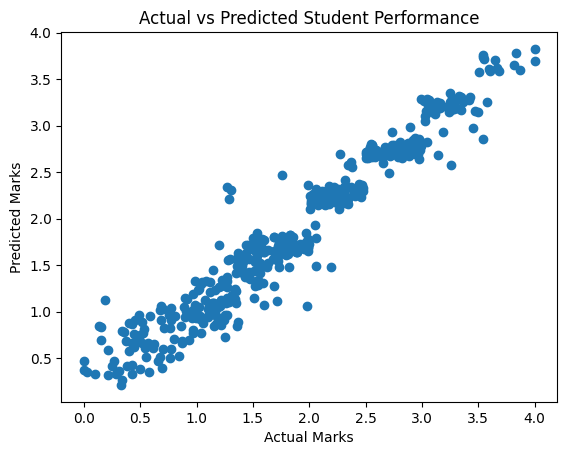

In [12]:
#visualization actual vs predicted
plt.figure()
plt.scatter(y_test, rf_pred)
plt.xlabel("Actual Marks")
plt.ylabel("Predicted Marks")
plt.title("Actual vs Predicted Student Performance")
plt.show()


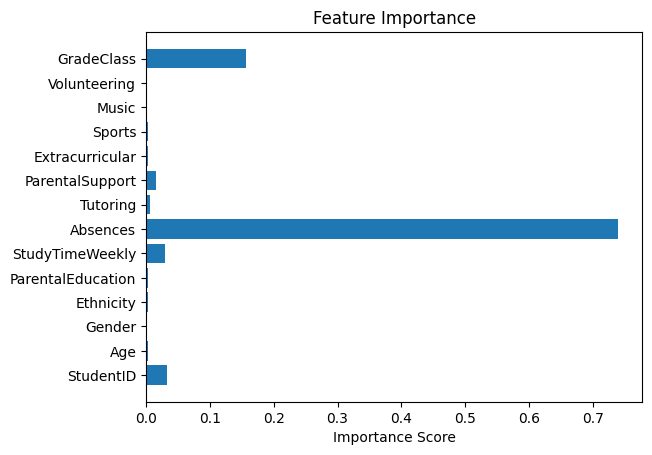

In [13]:
importance = rf_model.feature_importances_
features = X.columns

plt.figure()
plt.barh(features, importance)
plt.xlabel("Importance Score")
plt.title("Feature Importance")
plt.show()
